
# PYTHON-10. Методы визуализации данных


In [1]:
import pandas as pd

df = pd.read_csv('datasets/tips.csv')
df.head()

# total_bill — общая сумма, уплаченная за заказ;
# tip — размер чаевых;
# sex — пол клиента;
# smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
# day — день недели;
# time — время (обед или ужин);
# size — количество посетителей, обедавших за столом.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150.

df.shape


(244, 7)

In [3]:
df.total_bill.max()

50.81

In [4]:
%matplotlib inline


<AxesSubplot:>

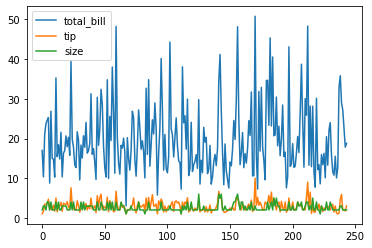

In [5]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

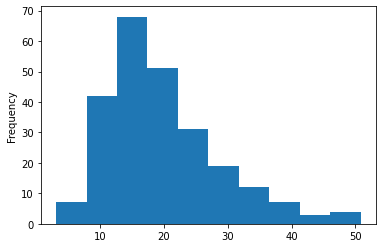

In [6]:
df['total_bill'].plot(kind='hist')

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

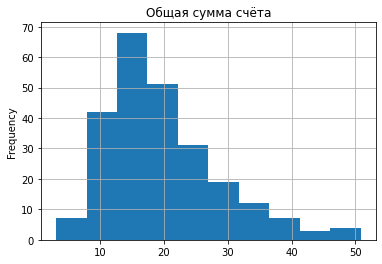

In [7]:
df.total_bill.plot(kind='hist', grid=True, title = 'Общая сумма счёта')

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

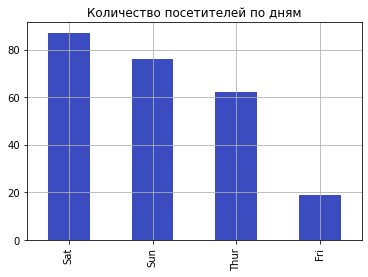

In [8]:
df.day.value_counts().plot(
    kind = 'bar',
    grid = True,
    colormap = 'coolwarm',
    title = 'Количество посетителей по дням'
)

<AxesSubplot:xlabel='sex,smoker'>

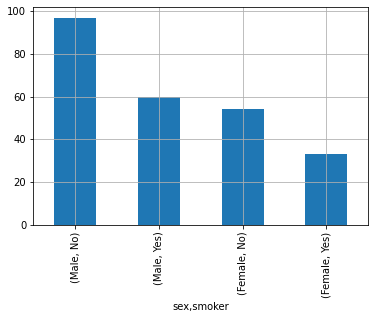

In [9]:
df[['sex', 'smoker']].value_counts().plot(kind = 'bar', grid= True)

<AxesSubplot:xlabel='sex,smoker'>

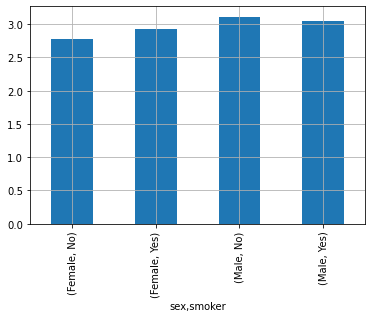

In [10]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

<AxesSubplot:xlabel='sex'>

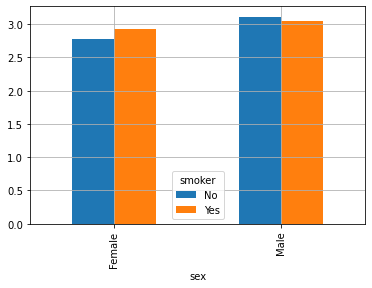

In [11]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'tip').plot(kind = 'bar', grid= True)

array([<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

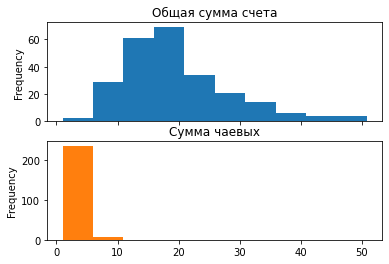

In [12]:

df[['total_bill','tip']].plot(
    kind = 'hist',
    subplots = True,
    title = ['Общая сумма счета', 'Сумма чаевых'],
    legend = False,
)


<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

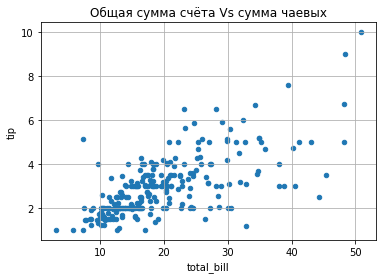

In [13]:
df.plot(x = 'total_bill',
        y = 'tip',
        kind = 'scatter',
        grid = True,
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

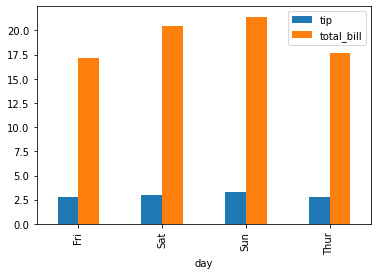

In [14]:
df.pivot_table(
    values= ['total_bill', 'tip'],
    index = 'day',
    aggfunc = 'mean'
).plot(kind = 'bar')

<AxesSubplot:xlabel='sex,smoker'>

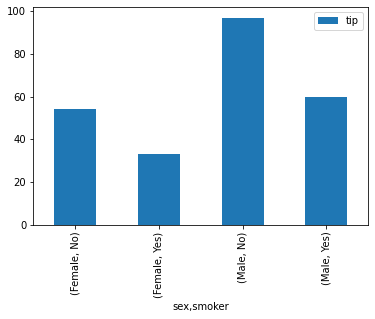

In [15]:
# Какой заголовок лучше подойдёт для диаграммы, созданной с помощью этого кода?
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')



<AxesSubplot:xlabel='smoker'>

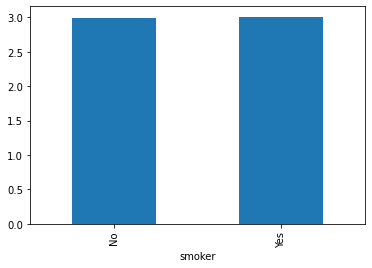

In [16]:
# Какой вариант кода лучше всего подходит для построения графика,
# отображающего среднюю сумму чаевых, которые оставляют курящие и некурящие посетители?
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/tips.csv')

Text(0.5, 0, 'Сумма заказа, USD')

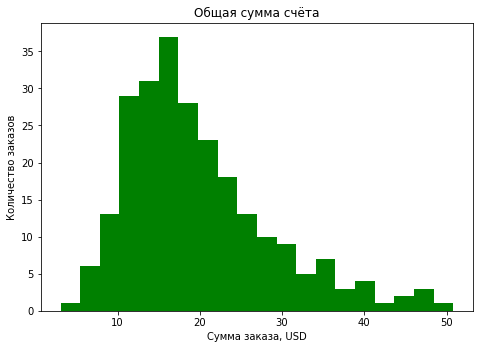

In [18]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(df['total_bill'], bins= 20 , color='green')
axes.set_title('Общая сумма счёта')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')


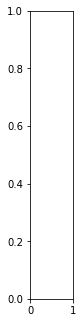

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.1, 1])
# axes.scatter(x = df['total_bill'], y = df['tip'], marker = '.')
# axes.set_title('Общая сумма счёта Vs Cумма чаевых')
# axes.set_xlabel('Сумма чека')
# axes.set_ylabel('Размер чаевых')

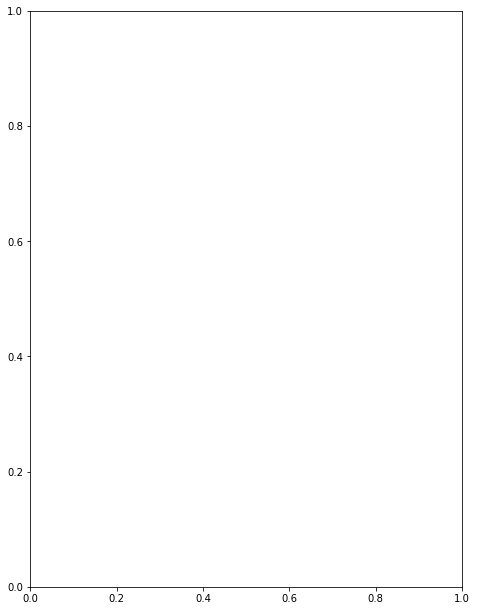

In [20]:
# Отметьте все варианты кода, в которых создаётся прямоугольная координатная плоскость с высотой больше ширины:
fig = plt.figure()

axes = fig.add_axes([0.2, 0.2, 0.5, 0.9])
axes = fig.add_axes([0.1,0.1,1,2])

<BarContainer object of 4 artists>

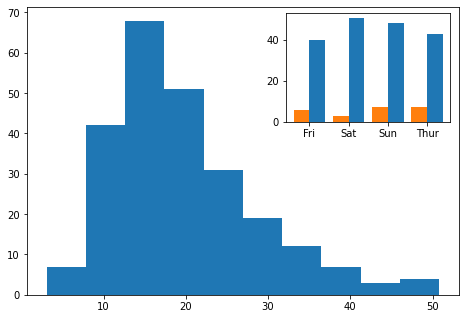

In [21]:
# create new figure
fig = plt.figure()
# main axes
main_axes = fig.add_axes([0,0,1,1])
# additional axes
insert_axes = fig.add_axes([0.6, 0.6, 0.38,0.38])

# prepare data for additional figure
# distribution min/max total bill by days
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

# draw to main plot - distribution total bill by in counts
main_axes.hist(df['total_bill'])

# draw to additional plot
insert_axes.bar(
    x = bills_per_day['day'],
    height = bills_per_day['max'],
    width = 0.4,
    align = 'edge'
)
insert_axes.bar(
    x = bills_per_day['day'],
    height = bills_per_day['min'],
    width = -0.4,
    align = 'edge'
)

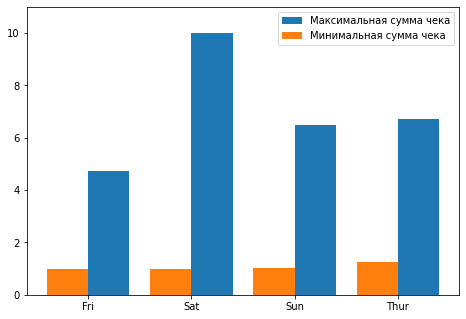

In [22]:
tips_per_day = df.groupby(by = 'day')['tip'].agg(['min','max']).reset_index()

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_ylim(0, 11)

axes.bar(
    x = tips_per_day['day'],
    height = tips_per_day['max'],
    width = 0.4,
    align = 'edge',
    label = 'Максимальная сумма чека'
)
axes.bar(
    x = tips_per_day['day'],
    height=tips_per_day['min'],
    width=-0.4,
    align='edge',
    label='Минимальная сумма чека'
)
axes.legend(loc=1)

Text(0.5, 1.0, 'Общая сумма счёта VS Сумма чаевых')

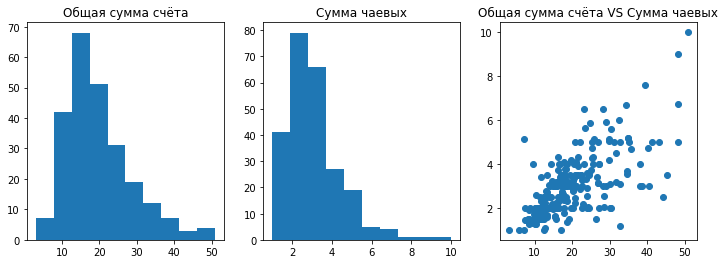

In [23]:

fig, axes = plt.subplots(1, 3, figsize = (12,4))

axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker='o')
axes[2].set_title('Общая сумма счёта VS Сумма чаевых')

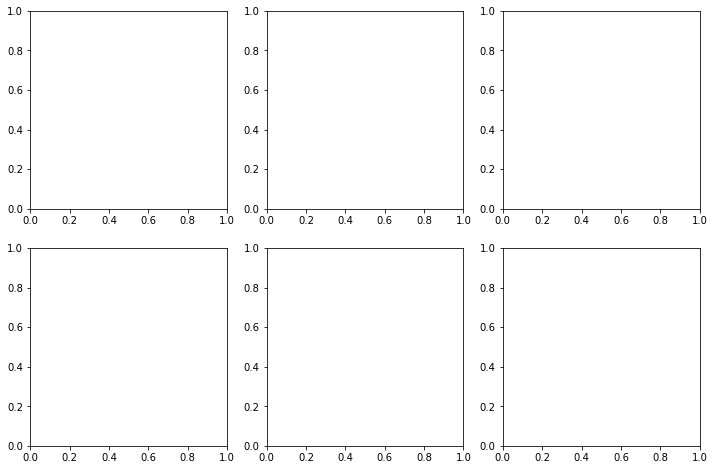

In [24]:
# С помощью какого кода можно создать 6 графиков, разместив их в 2 строки по 3 графика в каждом?

# fig, axes = plt.subplots(6, 3, figsize=(2,6))
fig, axes = plt.subplots(2, 3, figsize=(12,8))
# fig, axes = plt.subplots(3, 2, figsize=(8,12))

In [25]:

# С помощью какого кода можно вывести гистограмму распределения признака в позицию, которую она занимает на рисунке?
# axes[2][3].hist(df['tip'])
# axes[2][1].hist(df['tip'])
axes[1][2].hist(df['tip'])

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

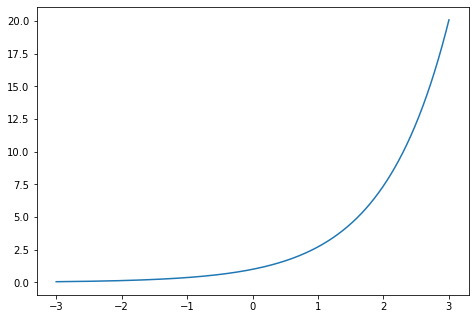

In [26]:
import numpy as np

x = np.linspace(start=-3., stop=3., num= 1000)
y1 = np.exp(x)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)


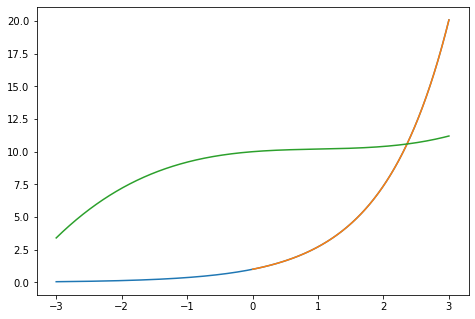

In [27]:
import numpy as np

x = np.linspace(start=-3., stop=3., num= 1000)
y1 = np.exp(x)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)

y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3
axes.plot(x[500:], y1[500:])
axes.plot(x, y2)

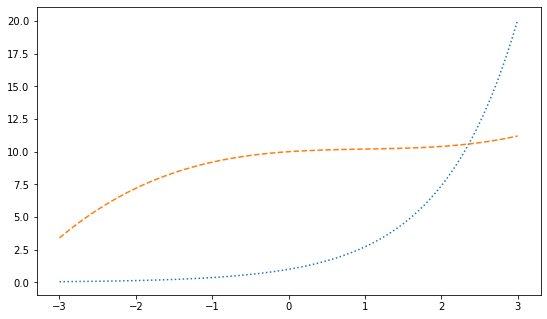

In [28]:

fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle=':')
axes.plot(x, y2, linestyle='--')


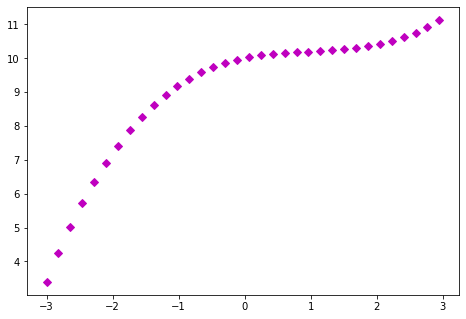

In [29]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

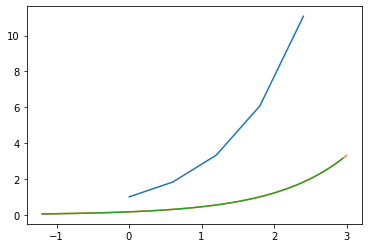

In [30]:
# Предположим, что мы создали следующую кривую для отрисовки:

x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

# Какой из вариантов вызова метода plot вернёт ошибку?
plt.plot(x[500::100], y1[500::100])
plt.plot(x[300:], y1[:700])
# plt.plot(x[:300], y1[:700])
plt.plot(x[300::10], y1[:700:10])

## Работа c Seaborn

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

%matplotlib inline


df = pd.read_csv('datasets/tips.csv')

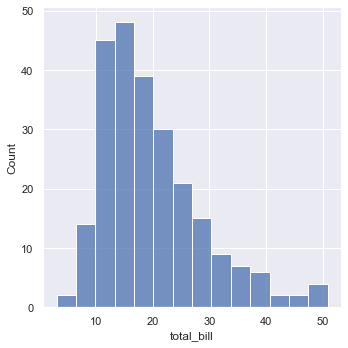

In [32]:
sns.set()
sns.displot(df['total_bill'])

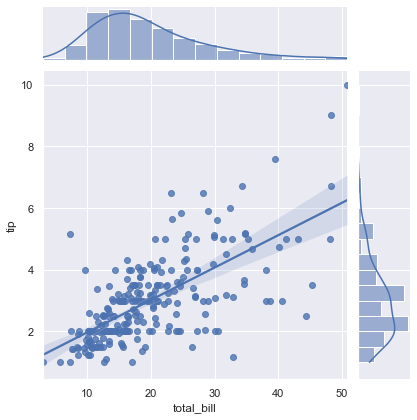

In [33]:
# не нужно предварительно группировать данные

sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = df,
    kind='reg'
)

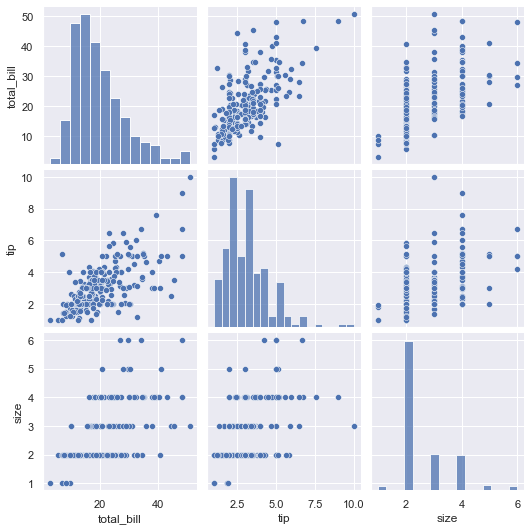

In [34]:
# полезная фича - сразу можно сравнить все признаки со всеми

sns.pairplot(df)

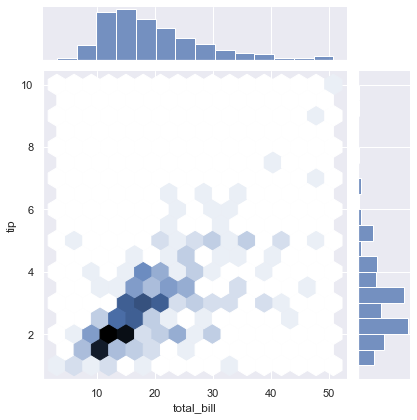

In [35]:
# Напишите, какое значение параметра kind используется для получения изображенного графика.
# Воспользуйтесь официальной документацией Seaborn.
sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = df,
    kind='hex'
)

## Категориальные признаки

<AxesSubplot:xlabel='day', ylabel='count'>

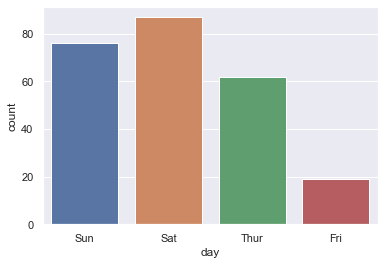

In [36]:
sns.countplot(x = 'day', data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

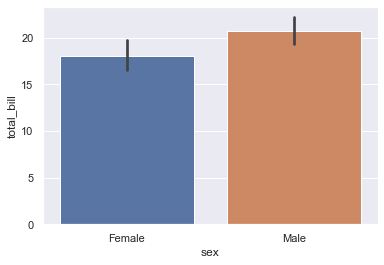

In [37]:
sns.barplot(x = 'sex', y= 'total_bill', data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

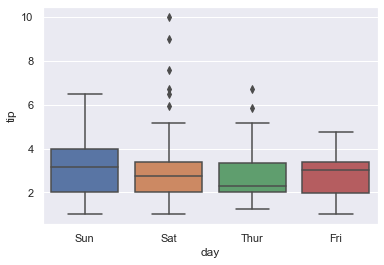

In [38]:
sns.boxplot(x='day', y= 'tip', data =df)

<AxesSubplot:xlabel='day', ylabel='tip'>

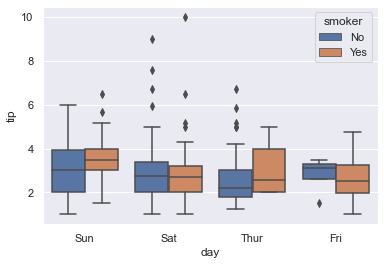

In [39]:
sns.boxplot(x='day', y= 'tip', data =df, hue='smoker')

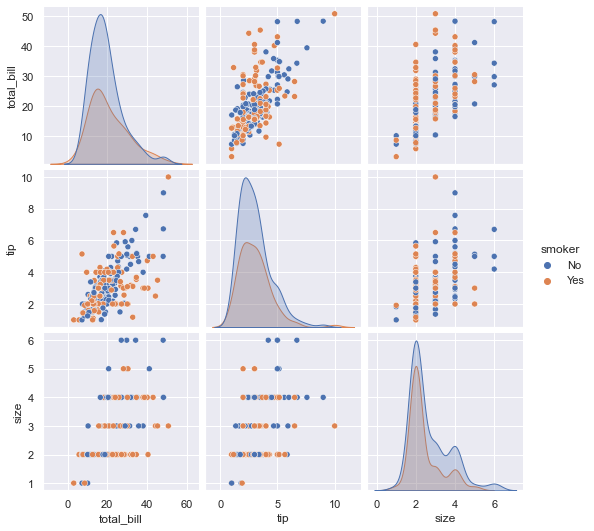

In [40]:
# Что станет результатом выполнения кода sns.pairplot(df, hue = 'smoker')?
sns.pairplot(df, hue = 'smoker')


## Графики табличного типа
### отображение корреляций между параметрами


<AxesSubplot:>

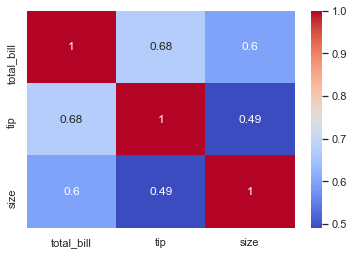

In [41]:
correlation = df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')



## Библиотека Plotly


In [42]:
import pandas as pd
import cufflinks as cf
from plotly.offline import (
    download_plotlyjs,
    init_notebook_mode,
    plot,
    iplot
)

init_notebook_mode(connected=True)
cf.go_offline()

<AxesSubplot:>

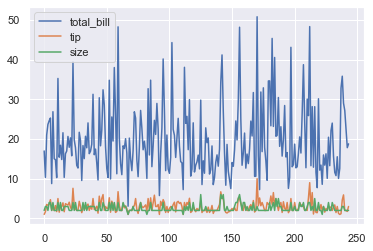

In [43]:
df = pd.read_csv('datasets/tips.csv')
df.plot()

In [44]:
df.iplot()

In [45]:
df[['total_bill','tip']].iplot(kind = 'spread')

/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [46]:
df.iplot(
    kind = 'bubble',
    x = 'total_bill',
    y = 'size',
    size = 'tip',
    color='red'
)


## Итоговый тест


<AxesSubplot:xlabel='day'>

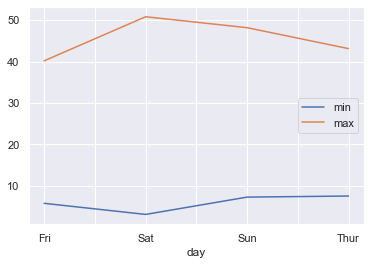

In [47]:
# Укажите код, который можно использовать для создания графика, показывающего изменение минимальной
# и максимальной суммы счёта по дням недели.

df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()
